<a href="https://colab.research.google.com/github/va22abb/Msc-Data-Project-Comparative-study-of-machine-learning-algorithms-in-predicting-cervical-cancer/blob/cerevical-cancer-modelling/Msc_project_Cervical_Cancer_Code__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cervical Cancer Prediction Model**

## Obejective Of This Study

•	To explore how different feature selection techniques and preprocessing methods influence the performance and efficiency of machine learning models on clinical and demographic datasets related to cervical cancer.

•	Using key metrics like accuracy, F1-score, and recall to assess machine learning models to predict cervical cancer.

•	Improve machine learning predictions' transparency and interpretability by using explainable AI techniques, particularly SHAP values.


## **Importing All The Required Libraries**

In [3]:
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.5.2
import sklearn
print(sklearn.__version__)

1.5.2


In [4]:
# Import the Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb
import shap

from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


# **Mounting My Drive**

In [5]:
# Mounting the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading The cc_dataset**

In [6]:
# Loading the dataset
cc_df = pd.read_csv('/content/drive/MyDrive/My Project/cervical_cancer_risk_factors_dataset.csv')
cc_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [7]:
# Check the number of rows and columns
cc_df.shape


(858, 36)

# **cc_data Preprocessing**

In [8]:
# Replacing '?' with None
cc_df.replace('?', None, inplace=True)
cc_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,0,0,0,0,0,0,0,0
2,34,1.0,None,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,None,None,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,None,None,0,0,0,0,0,0,0,0


In [9]:
# The necessary information of my data and statisics
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [10]:
# Converting object columns to float in my data
for col in cc_df.columns: # Going through each column in the dataFrame and tring to convert it to a number
    cc_df[col] = pd.to_numeric(cc_df[col], errors='coerce')   # Making value that can't be converted to  NaN instead of throwing an error

In [11]:
# Checking information of my dataset and statisics after covertion
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [12]:
# locating columns with missing values
def missing_values_table(cc_df):
        # Total missing values in each column
        mis_val = cc_df.isnull().sum()

        #  Calculating the percentage of missing values in each column
        mis_val_percent = 100 * cc_df.isnull().sum() / len(cc_df)

        # Making a table with the output
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Renaming the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sorting columns by highest percentage of missing data
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Printing a summary of missing data information
        print ("Your selected dataframe has " + str(cc_df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Returning the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
# Visualizing the columns with the missing entries with the number of missing data and the percentage of the missing data
cc_df_missing= missing_values_table(cc_df)
cc_df_missing

Your selected dataframe has 36 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
STDs: Time since last diagnosis,787,91.7
STDs: Time since first diagnosis,787,91.7
IUD,117,13.6
IUD (years),117,13.6
Hormonal Contraceptives,108,12.6
Hormonal Contraceptives (years),108,12.6
STDs:vulvo-perineal condylomatosis,105,12.2
STDs:HPV,105,12.2
STDs:Hepatitis B,105,12.2
STDs:HIV,105,12.2


In [14]:
# Dropping the two columns with excesive missing values
cc_df.drop('STDs: Time since first diagnosis', inplace=True, axis=1)
cc_df.drop('STDs: Time since last diagnosis', inplace=True, axis=1)
cc_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [15]:
# using the drop_duplicates method to remove duplicate rows
cc_df = cc_df.drop_duplicates()
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-null  

In [16]:
# filling the missing data in the dataset with the mean values for each of the columns.
cc_data = cc_df.fillna(cc_df.mean())
cc_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [17]:
# Visualizing the columns with the missing entries with the number of missing data and the percentage of the missing data
cc_data_missing= missing_values_table(cc_data)
cc_data_missing

Your selected dataframe has 34 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [18]:
# Checking the number of rows and columns
cc_data.shape

(835, 34)

# **The Exploratory cc_data Analysis (EDA)**

In [19]:
# using the describe method to check the statistical summary of the dataset
cc_data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,...,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,0.002721,0.089820,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.651365,2.805153,1.406092,0.354138,4.108329,2.238619,0.446366,3.552168,0.296809,...,0.048904,0.306335,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Removing Age that is below 16years due to Ethical Reason

In [20]:
# Drop rows where age is less than 16
cc_data = cc_data[cc_data['Age'] >= 16]

# Check the updated dataFrame
cc_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


## Removing First sexual intercourse that is below 16years due to Ethical Reason

In [21]:
# Drop rows where First sexual intercourse is less than 16
cc_data = cc_data[cc_data['First sexual intercourse'] >= 16]

# Check the updated dataFrame
cc_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.000000,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,0.0,0,0,0,0,0,1,1,0,1


In [22]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 2 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 570 non-null    int64  
 1   Number of sexual partners           570 non-null    float64
 2   First sexual intercourse            570 non-null    float64
 3   Num of pregnancies                  570 non-null    float64
 4   Smokes                              570 non-null    float64
 5   Smokes (years)                      570 non-null    float64
 6   Smokes (packs/year)                 570 non-null    float64
 7   Hormonal Contraceptives             570 non-null    float64
 8   Hormonal Contraceptives (years)     570 non-null    float64
 9   IUD                                 570 non-null    float64
 10  IUD (years)                         570 non-null    float64
 11  STDs                                570 non-null  

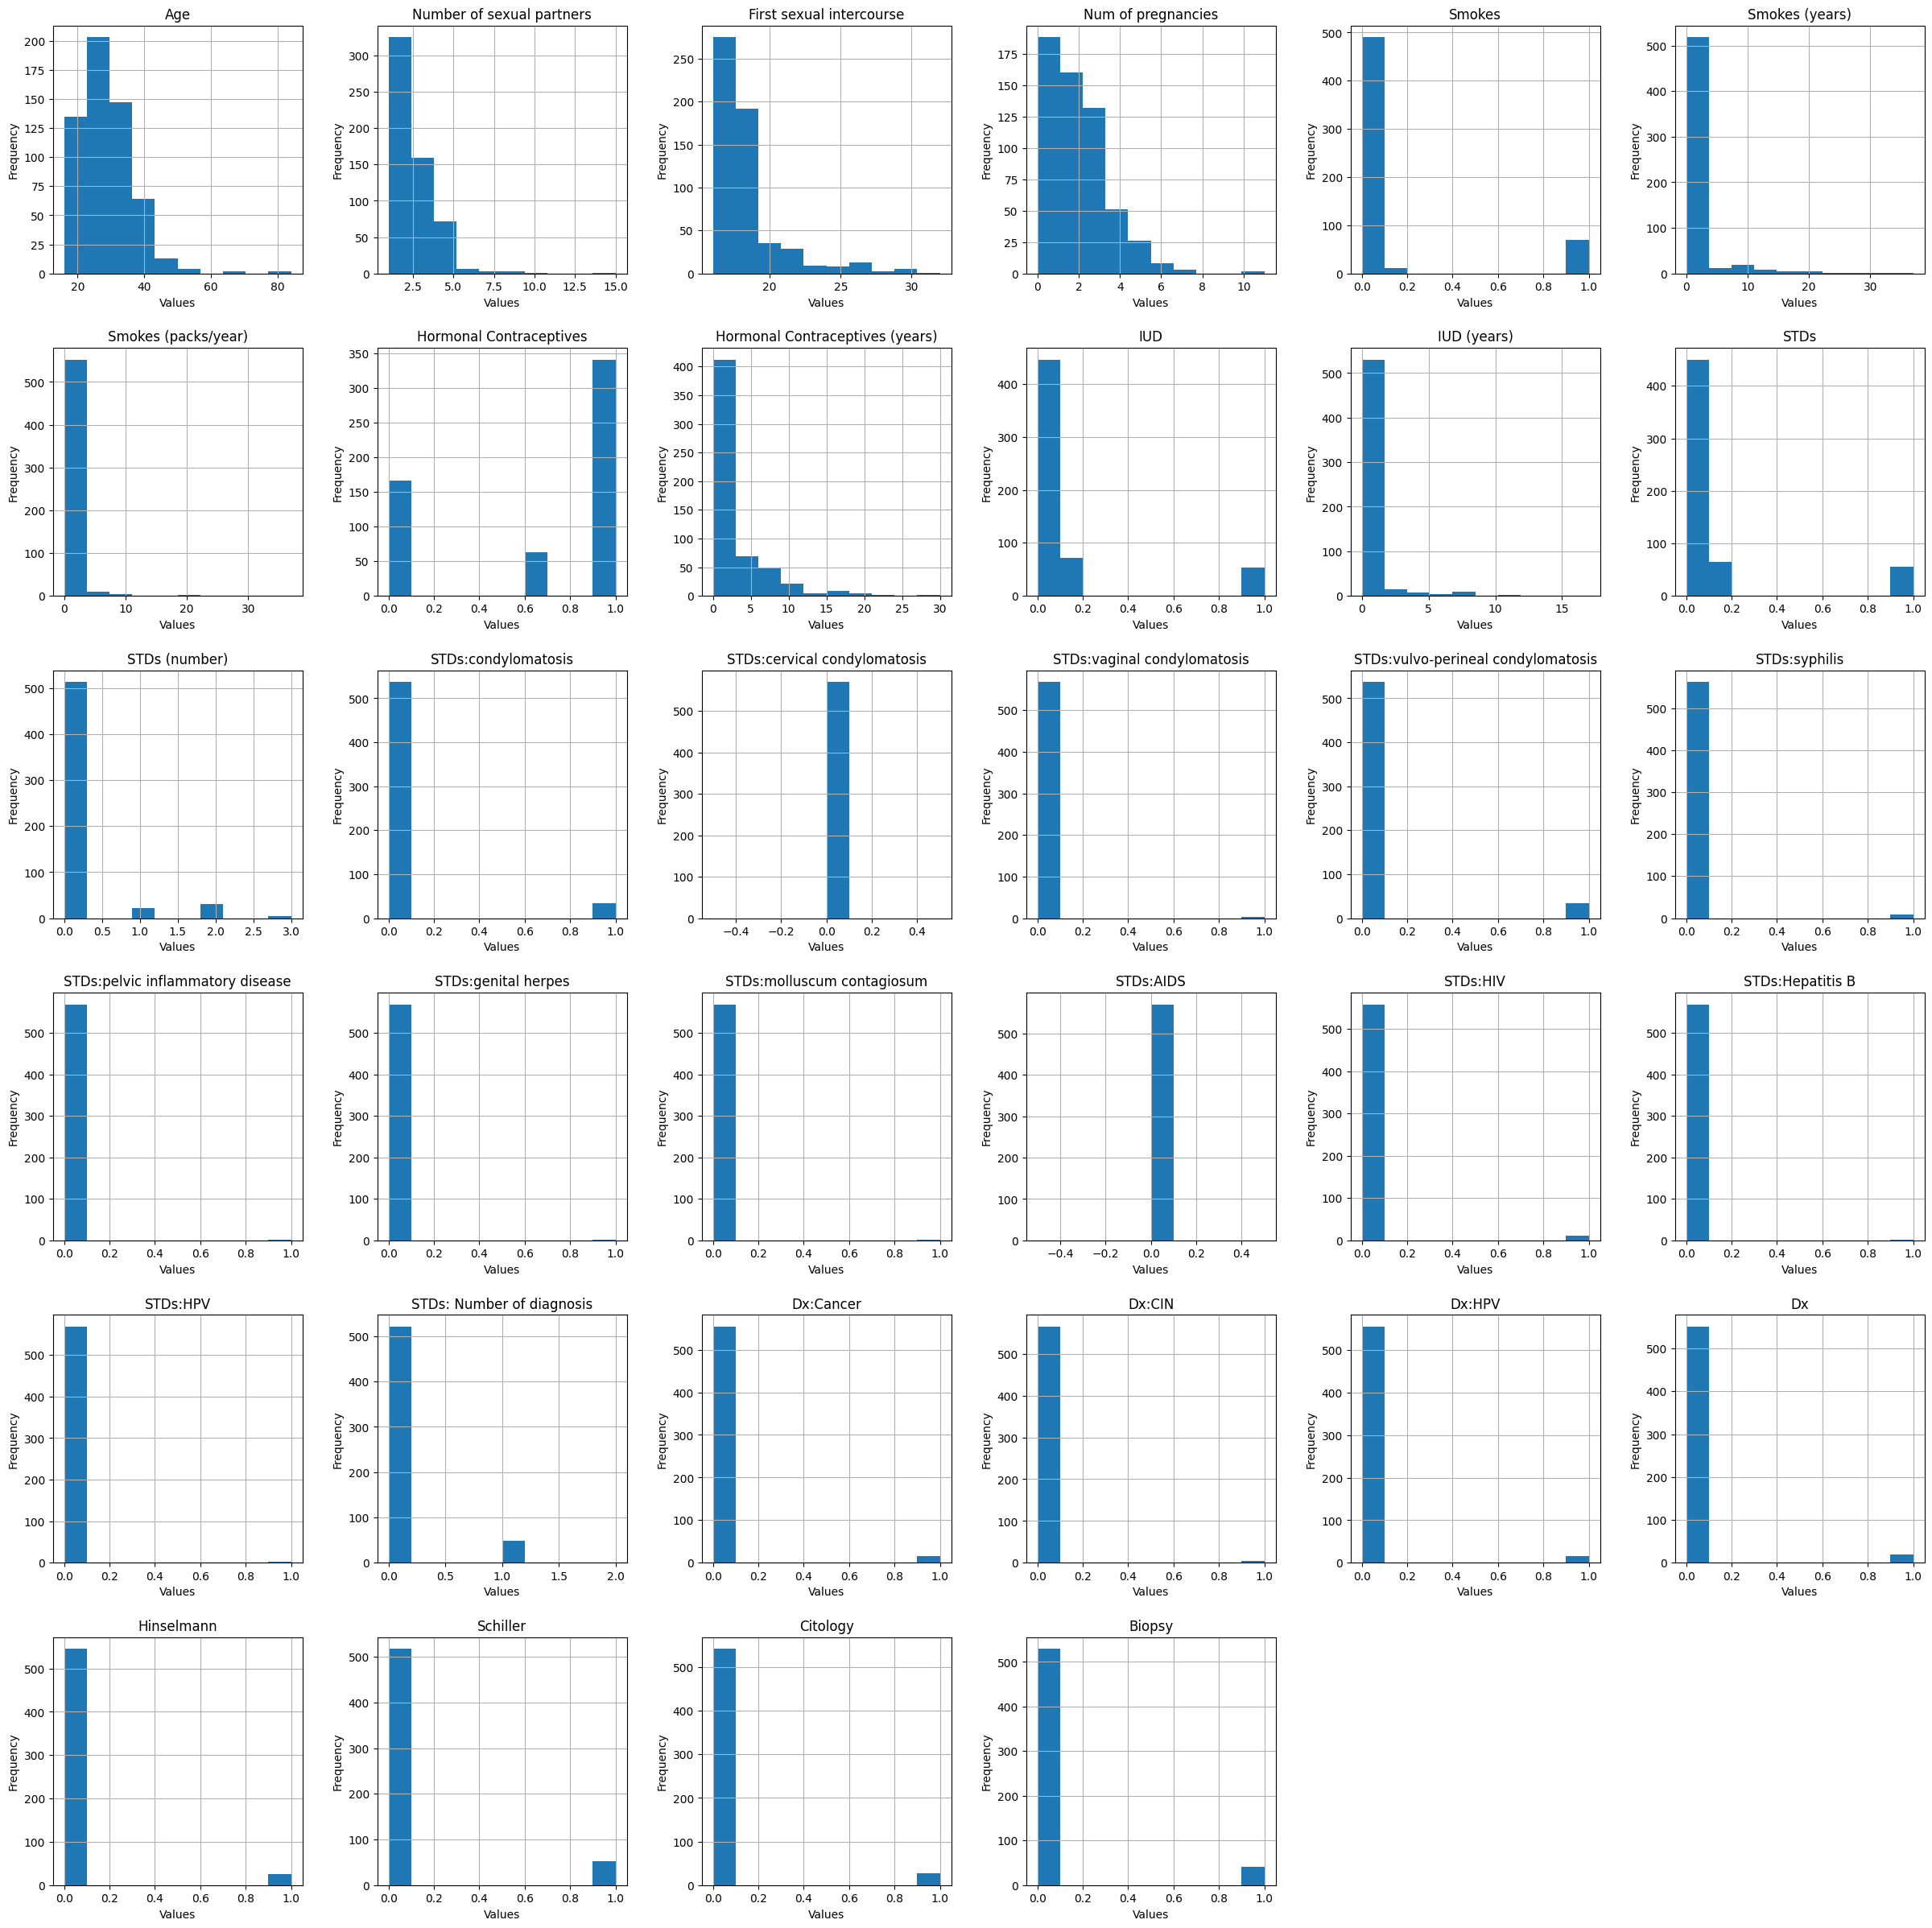

In [23]:
# plotting variation graphs for each property
axes = cc_data.hist(figsize=(30, 30)) # Setting the size of plot
for ax in axes.flatten(): ## Flattening the grid of subplots to can loop through each one individually
    ax.set_xlabel("Values")  # Setting x-axis label
    ax.set_ylabel("Frequency")  # Setting y-axis label
plt.show()

# **Insight of Variation Graph(Histogram)**

 X-axis: Represents the values of the feature in the dataset. For example, the feature age, the X-axis will show age ranges (e.g., 0-10, 10-20, 20-30, etc.).

Y-axis: Represents the frequency or count of occurrences of values within the range on the X-axis. The higher the bar, the more cc_data points fall into that particular range.

**TARGET VARIABLE**


Biopsy: This is the target variable and appears to be imbalanced, with most values concentrated at zero, indicating fewer positive biopsy results.

**FEATURES VARIABLES**

Age: Shows a distribution skewed toward younger ages, with most cc_data points concentrated in the lower range. This suggests that the dataset includes a higher number of younger individuals.

Number of sexual partners: This feature has a skewed distribution, with most values concentrated at lower counts, indicating that a majority of the individuals reported fewer sexual partners.

First sexual intercourse: This feature is also skewed, suggesting that most individuals had their first sexual experience in their late teens.

Num of pregnancies: This distribution shows that most individuals have had only a few pregnancies, with a sharp drop-off as the number of pregnancies increases.

Smokes and Smokes (years): A large portion of the data has values near zero for both smoking frequency and years of smoking, which might indicate a lower smoking rate among the individuals in the cc_dataset.

Other Features: Most of the features related to STDs, including "STDs: condylomatosis," "STDs: HPV," and others, show distributions heavily skewed toward zero or "no" responses. This might imply that a small number of individuals in the cc_dataset reported histories of these specific conditions.

In [24]:
# Checking the correlation among the dataset
cc_data.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.126972,0.283521,0.520439,0.117899,0.247903,0.137789,-0.013355,0.230726,0.278826,...,0.035893,-0.018054,0.094098,0.014566,0.095399,0.053467,-0.019446,0.130320,0.020533,0.044743
Number of sexual partners,0.126972,1.000000,-0.124298,0.085818,0.208955,0.160066,0.136878,-0.006645,-0.013512,0.021025,...,0.023346,0.089404,0.051892,0.010139,0.041341,0.038270,-0.069237,-0.021043,0.008169,-0.021703
First sexual intercourse,0.283521,-0.124298,1.000000,-0.074961,-0.085658,-0.066925,-0.056384,-0.068042,-0.074528,-0.002655,...,0.016489,-0.011363,0.034347,-0.030859,0.023542,0.013543,-0.036615,-0.022473,0.010872,-0.020396
Num of pregnancies,0.520439,0.085818,-0.074961,1.000000,0.118802,0.220943,0.120213,0.067516,0.156132,0.192378,...,-0.034235,-0.011135,0.028839,-0.029283,0.039940,0.000849,0.066494,0.156206,0.020732,0.050809
Smokes,0.117899,0.208955,-0.085658,0.118802,1.000000,0.756700,0.497764,-0.021325,0.021898,-0.066447,...,0.068394,0.116493,0.005432,-0.035790,0.009774,-0.066160,0.027643,0.087723,-0.032909,0.022263
Smokes (years),0.247903,0.160066,-0.066925,0.220943,0.756700,1.000000,0.729028,-0.032848,0.007391,0.022618,...,0.058163,0.074683,0.072154,-0.026981,0.077597,-0.050427,0.045983,0.094927,-0.019691,0.037088
Smokes (packs/year),0.137789,0.136878,-0.056384,0.120213,0.497764,0.729028,1.000000,0.004952,0.004533,0.014190,...,-0.009690,0.038258,0.132094,-0.017749,0.138371,-0.033167,-0.013962,-0.003690,-0.033663,-0.013956
Hormonal Contraceptives,-0.013355,-0.006645,-0.068042,0.067516,-0.021325,-0.032848,0.004952,1.000000,0.444171,0.004667,...,0.044322,-0.053578,0.006616,-0.014934,0.014797,-0.023924,0.024064,-0.007155,0.004263,-0.007379
Hormonal Contraceptives (years),0.230726,-0.013512,-0.074528,0.156132,0.021898,0.007391,0.004533,0.444171,1.000000,0.111383,...,0.055649,-0.044327,0.020252,-0.012677,0.034713,-0.031426,0.046301,0.093602,0.088199,0.068670
IUD,0.278826,0.021025,-0.002655,0.192378,-0.066447,0.022618,0.014190,0.004667,0.111383,1.000000,...,-0.022048,0.025474,0.157813,0.045238,0.095252,0.179878,0.068881,0.134714,0.031279,0.111080


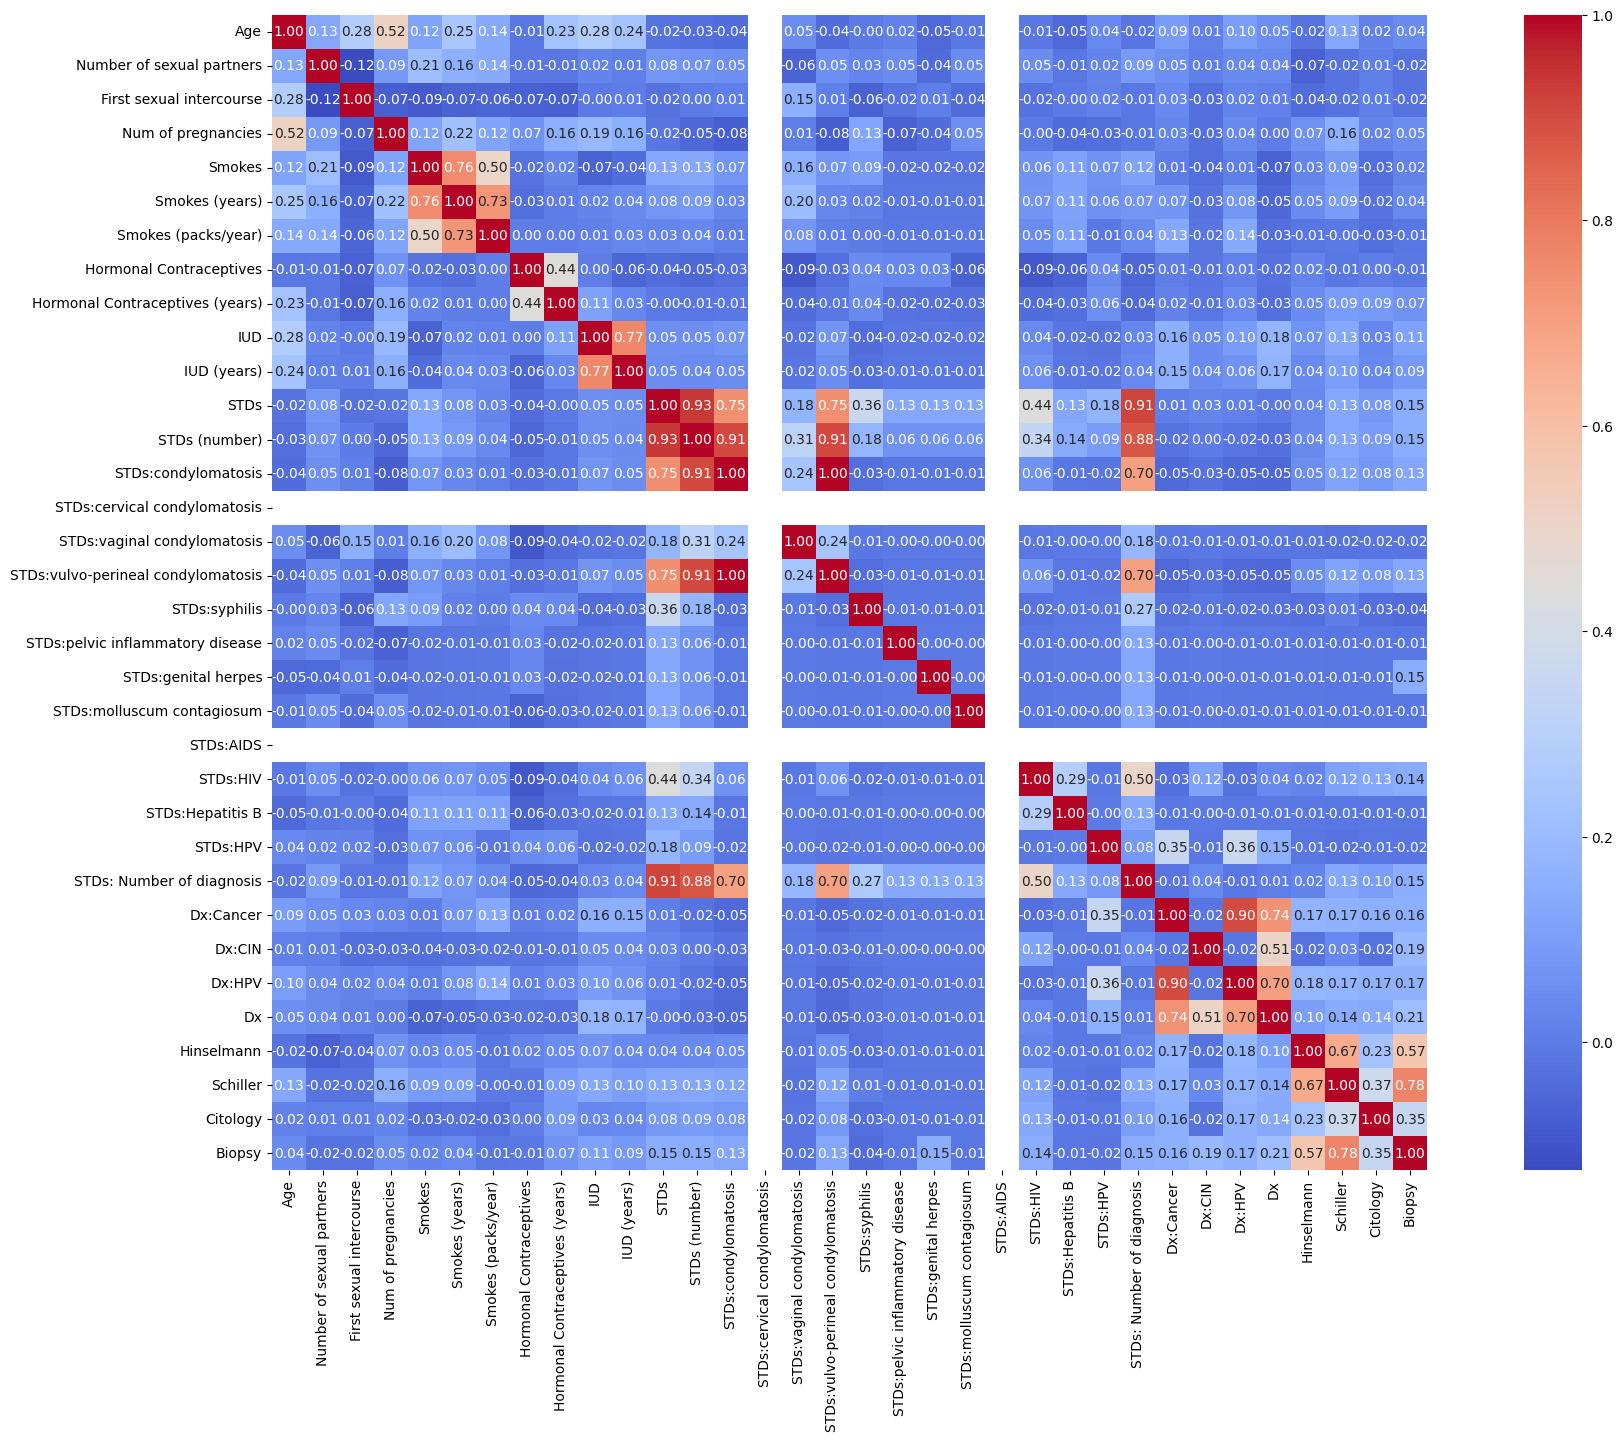

In [25]:
# Calculating the correlation matrix
corr_matrix = cc_data.corr()

# Plotting the heatmap with a specified figure size
plt.figure(figsize=(25, 15))  # Adjustng the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()


# **Correlation Heatmap Insight**
The correlation heatmap illustrates relationships between features, with values ranging from -1, indicating a perfect negative correlation, to 1, indicating a perfect positive correlation, and 0 indicating no linear relationship. Features such as STDs: Number of diagnoses strongly correlate with STDs (number) and specific STD indicators like STDs: syphilis and STDs: HPV. Similarly, Smokes (packs/year) and Smokes (years) are highly correlated, reflecting shared smoking behaviour. Moderate correlations are observed between First sexual intercourse and Age, with a negative correlation suggesting younger sexual initiation among older individuals in the dataset, and between Hormonal contraceptives (years) and Number of pregnancies, reflecting reproductive health patterns. Some features, such as STDs: AIDS and STDs: Cervical condylomatosis, exhibit no correlation with other variables, indicating irrelevance to predictive insights. Removing such low-correlation features simplifies the cc_dataset, reduces computational cost, and improves model performance. The heatmap highlights multicollinearity(provide similar information), aiding in feature selection and dimensionality reduction.

In [26]:
# Dropping the two columns that has no correlation at all with other columns in the dataset
cc_data = cc_data.drop(['STDs:cervical condylomatosis', 'STDs:AIDS'], axis=1)

In [27]:
# Display the first 5 rows of the dataset after dropping the two columns
cc_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.000000,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,0.0,0,0,0,0,0,1,1,0,1


# **Feature Importance**

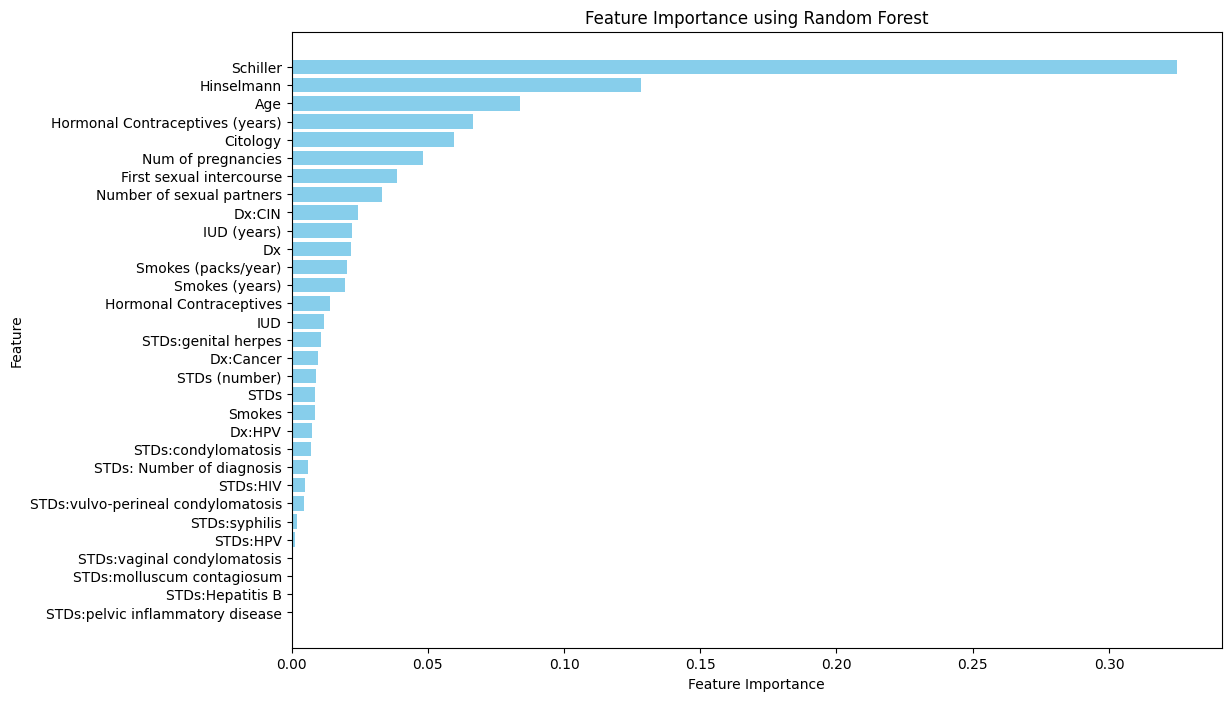

In [28]:
# Dropping the target variable and defining input features (X) and the target (y) for prediction
X = cc_data.drop(columns=['Biopsy'])
y = cc_data['Biopsy']

# Initializing and training the Random Forest model on the dataset
fi_model = RandomForestClassifier(random_state=42)
fi_model.fit(X, y)

# Getting feature importances values into a dataframe for easier use
importances = fi_model.feature_importances_
feature_names = X.columns

# Creating a feature importances into dataFrame for easier visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plotting feature importances to highlight key predictive factors in the model
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance using Random Forest")
plt.gca().invert_yaxis()
plt.show()


# **Insight of the feature importance**
This Random Forest feature importance graph highlights the variables most critical to the model's predictive performance. The "Schiller" feature ranks highest, significantly influencing predictions, followed by "Hinselmann", "Age", and "Hormonal Contraceptives (years)". These top features provide the model with substantial predictive power.

Mid-tier features like "First sexual intercourse", "Citology", "Num of pregnancies", and "Number of sexual partners" moderately impact the model. In contrast, features related to sexually transmitted diseases (e.g., "STDs: genital herpes", "STDs: HIV") and "IUD (years)" have lower importance, suggesting limited or redundant contributions.

This analysis identifies the key variables driving predictions, allowing prioritisation of data collection and model optimisation around top-ranking features. Less important features might be excluded to streamline the model without affecting accuracy. Overall, this visualisation aids in understanding the model's decision-making process and supports targeted feature engineering..








In [29]:
# Creating a dataFrame for feature importances  and display them in descending order
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Displaying the feature importances table
feature_importances

,Feature,Importance
29,Schiller,0.325062
28,Hinselmann,0.128391
0,Age,0.083748
8,Hormonal Contraceptives (years),0.066709
30,Citology,0.059572
3,Num of pregnancies,0.048328
2,First sexual intercourse,0.038574
1,Number of sexual partners,0.033070
25,Dx:CIN,0.024373
10,IUD (years),0.022166


In [30]:
# Keeping only features with an importance score of 0.01 or higher
important_features = feature_importances[feature_importances['Importance'] >= 0.01]['Feature']

# Selecting only the important features from the original data
cc_data_important = cc_data[important_features]

# Showing the retained columns
print("Retained columns:")
cc_data_important.head(10)

Retained columns:


,Schiller,Hinselmann,Age,Hormonal Contraceptives (years),Citology,Num of pregnancies,First sexual intercourse,Number of sexual partners,Dx:CIN,IUD (years),Dx,Smokes (packs/year),Smokes (years),Hormonal Contraceptives,IUD,STDs:genital herpes
2,0,0,34,0.0,0,1.0,17.020531,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,0,0,52,3.0,0,4.0,16.000000,5.0,0,0.0,0,37.0,37.0,1.0,0.0,0.0
4,0,0,46,15.0,0,4.0,21.000000,3.0,0,0.0,0,0.0,0.0,1.0,0.0,0.0
5,0,0,42,0.0,0,2.0,23.000000,3.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
6,1,1,51,0.0,0,6.0,17.000000,3.0,0,7.0,0,3.4,34.0,0.0,1.0,0.0
7,0,0,26,2.0,0,3.0,26.000000,1.0,0,7.0,0,0.0,0.0,1.0,1.0,0.0
8,0,0,45,0.0,0,5.0,20.000000,1.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0
10,0,0,44,2.0,0,4.0,26.000000,3.0,0,0.0,0,0.0,0.0,1.0,0.0,0.0
11,0,0,27,8.0,0,3.0,17.000000,1.0,0,0.0,0,0.0,0.0,1.0,0.0,0.0
13,0,0,44,5.0,0,2.0,25.000000,2.0,0,0.0,0,0.0,0.0,1.0,0.0,0.0


In [31]:
# Checking the numbe of remaining  rows and columns
cc_data_important.shape


(570, 16)

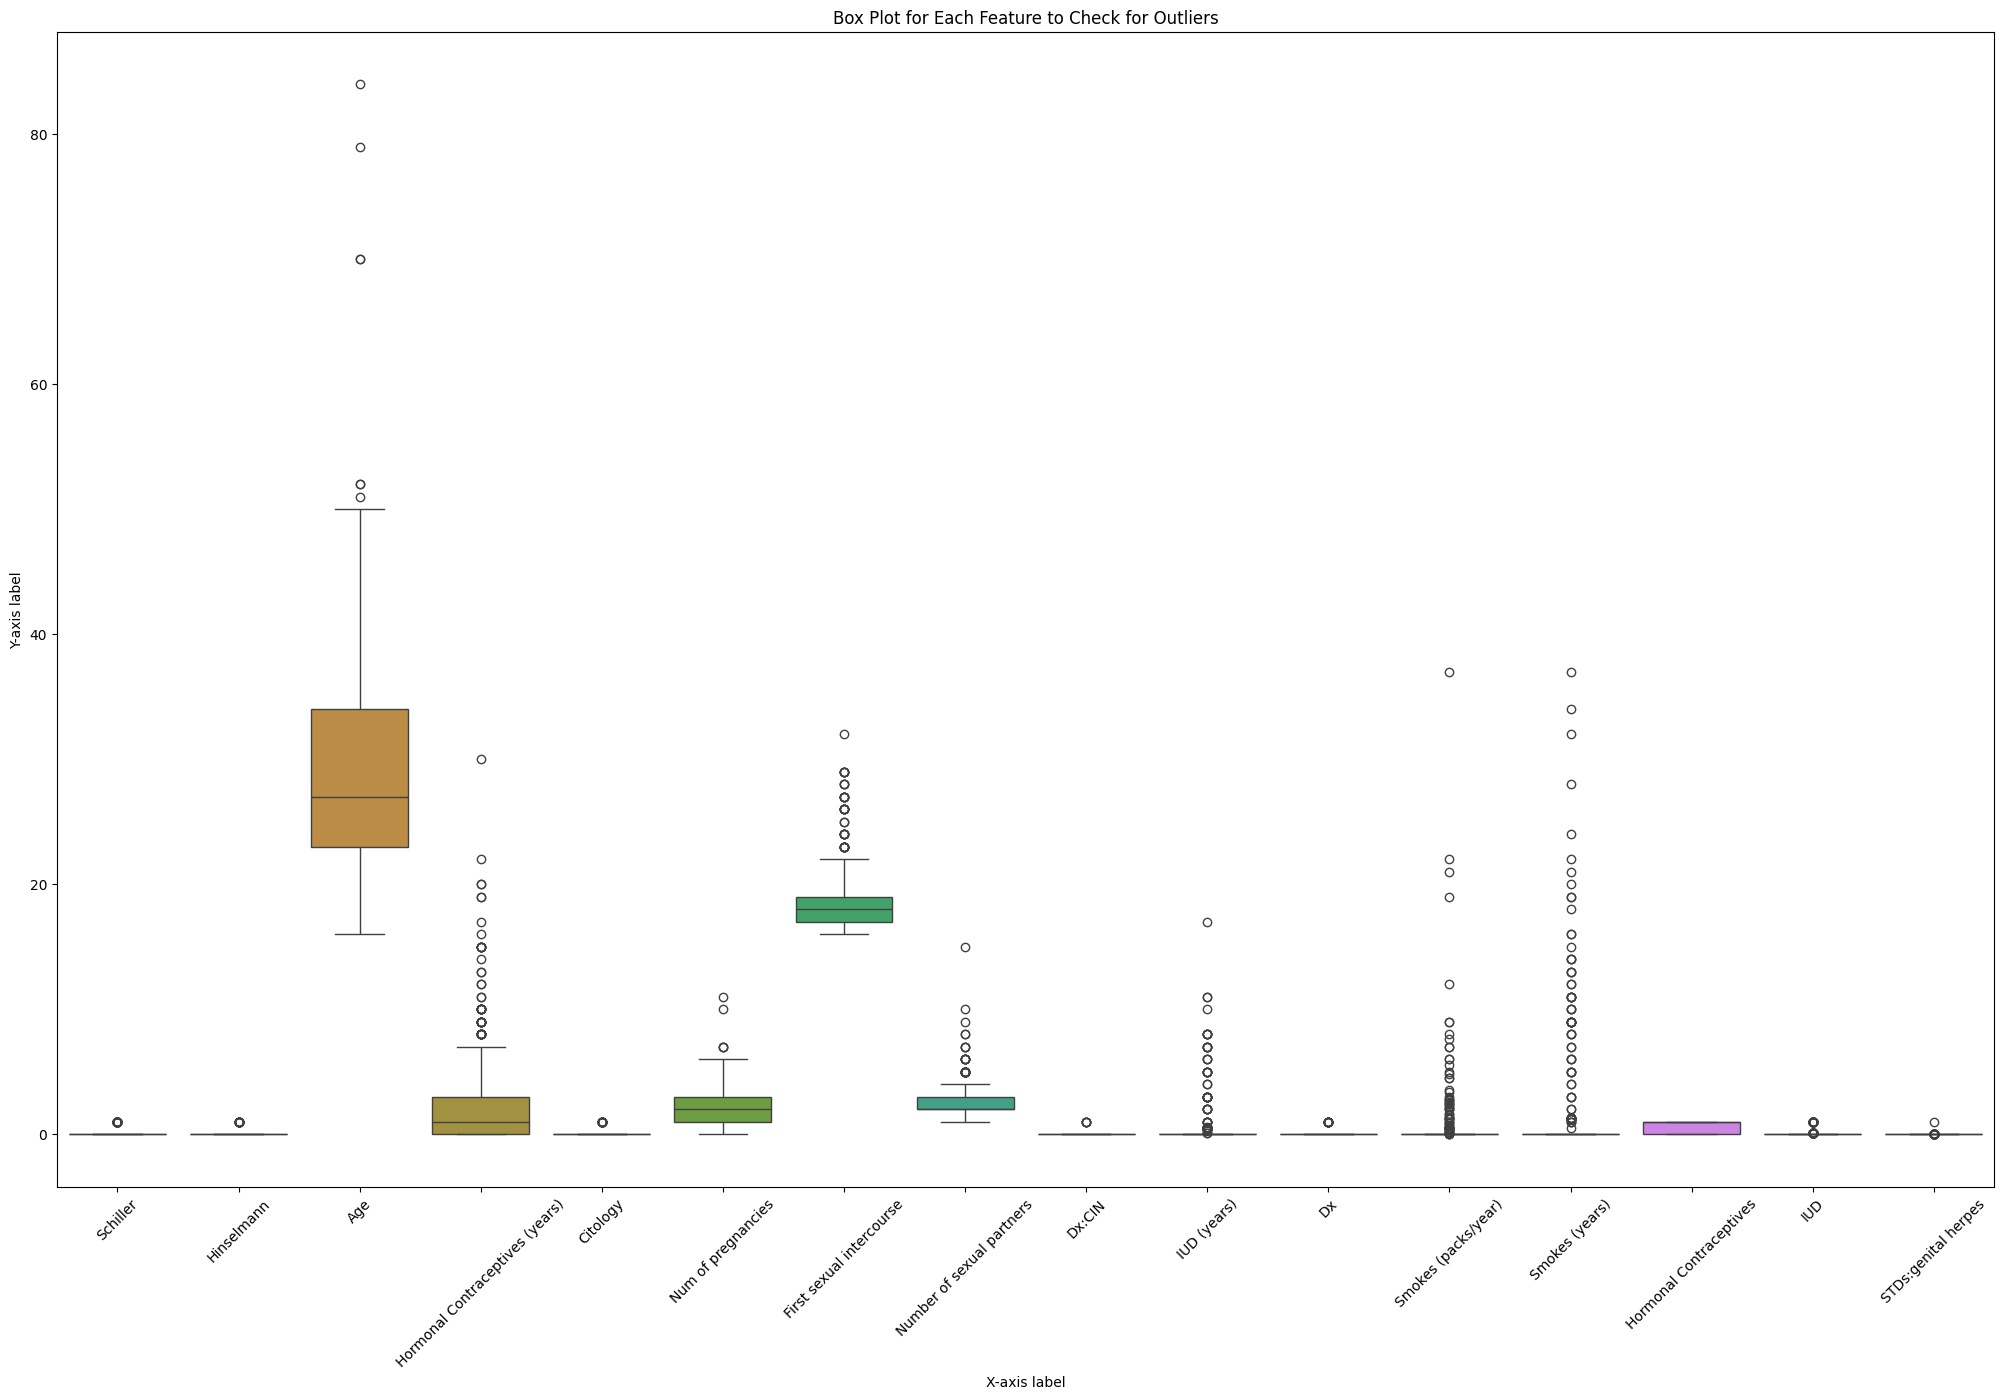

In [32]:
# Setting up the plot size
plt.figure(figsize=(25, 15))

# Using seaborn's boxplot function box plot for important features
sns.boxplot(data=cc_data_important)

# Adding labels and a title to the plot
plt.xticks(rotation=45)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Box Plot for Each Feature to Check for Outliers')

# Display the plot
plt.show()

The box plot visualises the distribution of multiple features in the dataset, highlighting potential outliers and spread. Each box represents the interquartile range (IQR), with the line inside marking the median. The whiskers extend to show the range of cc_data within 1.5 times the IQR, and dots outside the whiskers indicate outliers.

* Age has a wide range and several outliers above 60, suggesting extreme values in older individuals.
* Hormonal Contraceptives (years), First sexual intercourse, and Number of pregnancies have moderate ranges but show numerous outliers, indicating variability in reproductive-related data.
* Smoking-related features (Smokes (packs/year), Smokes (years)) exhibit significant outliers, reflecting variation in smoking habits among participants.
* Features such as Schiller, Hinselmann, and Dx have limited spread, with most values clustered near zero and few outliers.
* Other features, like IUD and sexually transmitted disease indicators, have very compact distributions, suggesting sparse data or binary attributes.

This analysis helps identify data anomalies and informs preprocessing steps like outlier handling.

Biopsy
Negative    92.807018
Positive     7.192982
Name: proportion, dtype: float64


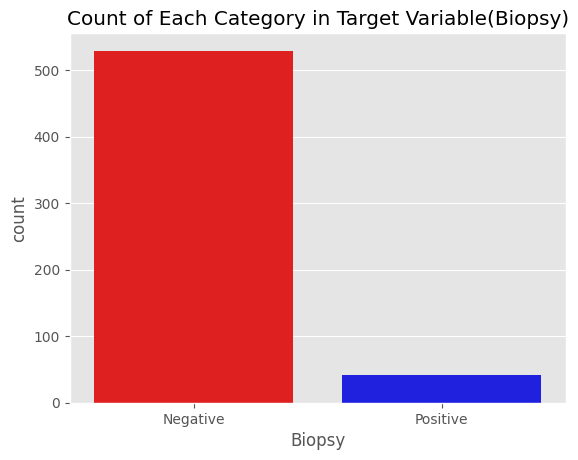

In [33]:
# Replacing 0 with 'Negative' and 1 with 'Positive'
cc_data['Biopsy'] = cc_data['Biopsy'].replace({0: 'Negative', 1: 'Positive'})

# Plotting with updated labels and adding different colors
plt.style.use('ggplot')
# The data argument should be set to the DataFrame containing the data
sns.countplot(x='Biopsy', data=cc_data, palette=['red', 'blue']).set_title('Count of Each Category in Target Variable(Biopsy)')

# showing the normalized value counts
print(cc_data['Biopsy'].value_counts(normalize=True) * 100)
plt.show()

# **Splitting dataset to Train and Test**

In [34]:
# Assigning important features to X for model training and analysis
X = cc_data_important

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# **Feature Scaling**

In [35]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Machine Learning Modeling**

# Using Support Vector Classification (SVC)

In [36]:
# Creating and fitting the SVM model with balanced class weights
support_vm_model = SVC(class_weight='balanced', kernel='rbf')
support_vm_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_support_vm = support_vm_model.predict(X_test_scaled)

# Evaluating the model
print(confusion_matrix(y_test, y_pred_support_vm))
print(classification_report(y_test, y_pred_support_vm))


[[153   6]
 [  3   9]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       159
           1       0.60      0.75      0.67        12

    accuracy                           0.95       171
   macro avg       0.79      0.86      0.82       171
weighted avg       0.95      0.95      0.95       171



# Using Random Forest Classifier

In [37]:
# Creating and fitting the Random Forest model with balanced class weights
rand_f_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rand_f_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_rand_f = rand_f_model.predict(X_test_scaled)

# Evaluating the model
print(confusion_matrix(y_test, y_pred_rand_f))
print(classification_report(y_test, y_pred_rand_f))

[[156   3]
 [  6   6]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       159
           1       0.67      0.50      0.57        12

    accuracy                           0.95       171
   macro avg       0.81      0.74      0.77       171
weighted avg       0.94      0.95      0.94       171



# Using XGBoost Model

In [38]:
# Calculate scale_pos_weight (this is an approximation to balance the class weights)
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

# Create the XGBoost model
xgboost_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Fit the model
xgboost_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgboost = xgboost_model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_xgboost))
print(classification_report(y_test, y_pred_xgboost))

[[154   5]
 [  1  11]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.69      0.92      0.79        12

    accuracy                           0.96       171
   macro avg       0.84      0.94      0.88       171
weighted avg       0.97      0.96      0.97       171



In [39]:
# Defining a function to evaluate accuracy for a model
def evaluate_accuracy(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

# Evaluating the SVM model
svm_accuracy = evaluate_accuracy(y_test, y_pred_support_vm)

# Evaluating the Random Forest model
rf_accuracy = evaluate_accuracy(y_test, y_pred_rand_f)

# Evaluating the XGBoost model
xgb_accuracy = evaluate_accuracy(y_test, y_pred_xgboost)

# Creating a comparison table
results_table = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [round(svm_accuracy, 2), round(rf_accuracy, 2), round(xgb_accuracy, 2)]
})

# Visualizing the table
print("\nComparison of Model Accuracy:")
print(results_table)

# Optionally,Saving the table to CSV file
results_table.to_csv("model_accuracy_comparison.csv", index=False)


Comparison of Model Accuracy:
           Model  Accuracy
0            SVM      0.95
1  Random Forest      0.95
2        XGBoost      0.96


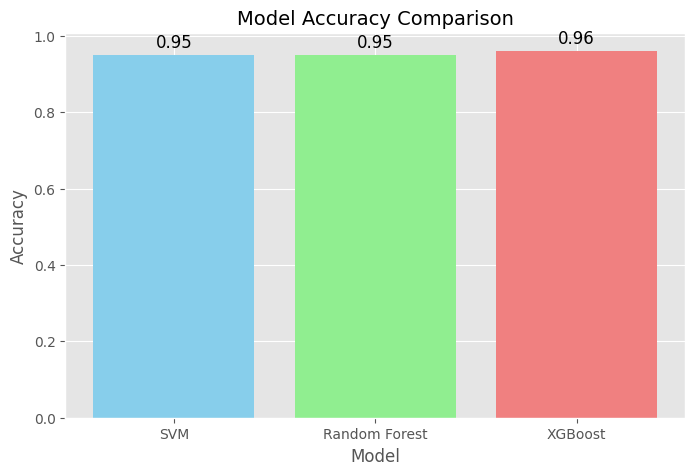

In [40]:
# Plotting the accuracy comparison bar chart
plt.figure(figsize=(8, 5))
plt.bar(results_table['Model'], results_table['Accuracy'], color=['skyblue', 'lightgreen', 'lightcoral'])

# Adding labels and title
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Showing the accuracy values on top of the bars
for i, v in enumerate(results_table['Accuracy']):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


# **Confusion Matrix: Visualizing Model Performance**

In [41]:
# Function to plot a confusion matrix for visualizing model performance
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    # Compute the confusion matrix based on true and predicted labels
    cm = confusion_matrix(y_true, y_pred)

    # Setting the size of the plot
    plt.figure(figsize=(8, 6))

    # Plotting the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

    # Adding a title to the plot
    plt.title(title)

    # Labelling the x-axis to indicate predicted classes
    plt.xlabel('Predicted')

    # Labelling the y-axis to indicate true classes
    plt.ylabel('True')

    # Displing the plot
    plt.show()


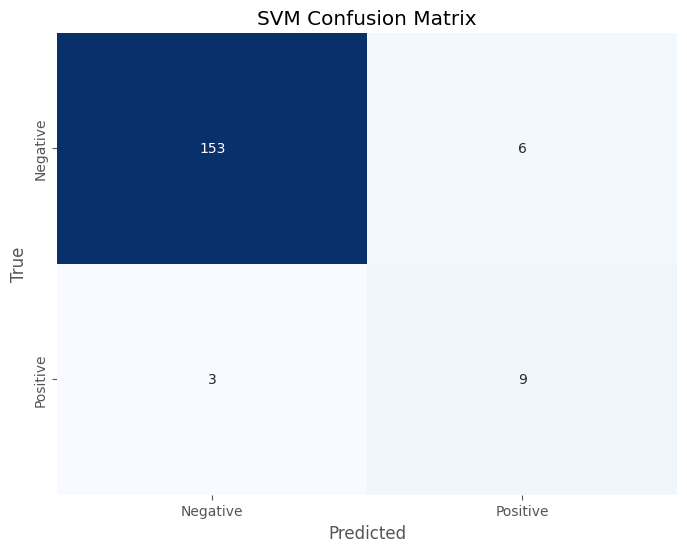

In [42]:
# Plotting heatmap for SVM confusion matrix
plot_confusion_matrix(y_test, y_pred_support_vm, title='SVM Confusion Matrix')

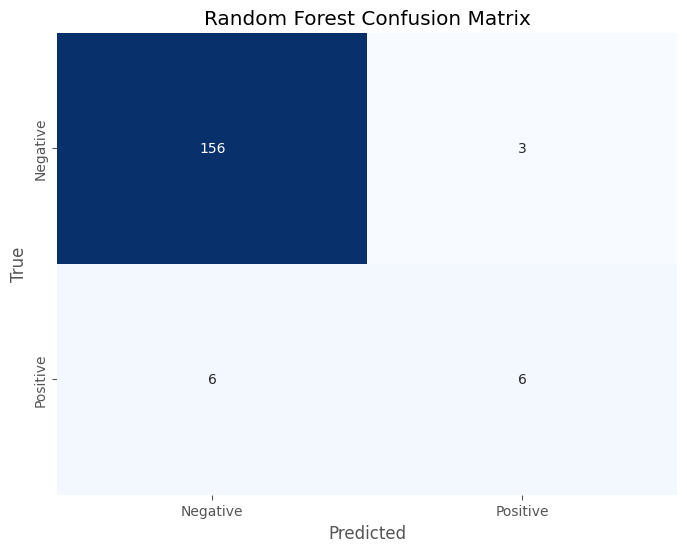

In [43]:
# Plotting heatmap for Random Forest confusion matrix
plot_confusion_matrix(y_test, y_pred_rand_f, title='Random Forest Confusion Matrix')

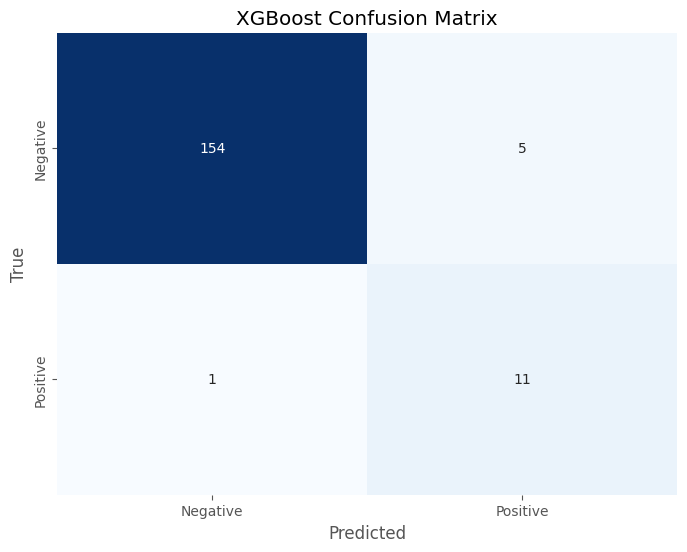

In [44]:
# Plotting heatmap for XGBoost confusion matrix
plot_confusion_matrix(y_test, y_pred_xgboost, title='XGBoost Confusion Matrix')

#AUC Score and ROC Curve(Receiver Operating Characteristic curve)

In [45]:
# Resetting the matplotlib state
plt.clf()
plt.close('all')
plt.style.use('default')  # Ensuring consistent plotting style

# Function to plot ROC curve
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR)
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

   # Creating the plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Geting predicted probabilities for the Models
# Getting Decision function for SVC
y_scores_svm = support_vm_model.decision_function(X_test_scaled)

# Geting predicted probabilities for Random Forest
y_scores_rf = rand_f_model.predict_proba(X_test_scaled)[:, 1]

# Getting predicted probabilities for XGBoost
y_scores_xgb = xgboost_model.predict_proba(X_test_scaled)[:, 1]

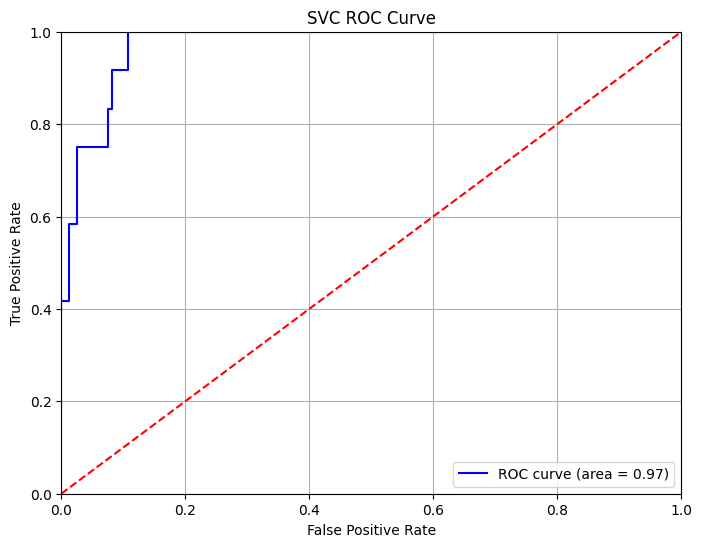

In [46]:
# Ploting ROC curve for SVM
plot_roc_curve(y_test, y_scores_svm, title='SVC ROC Curve')

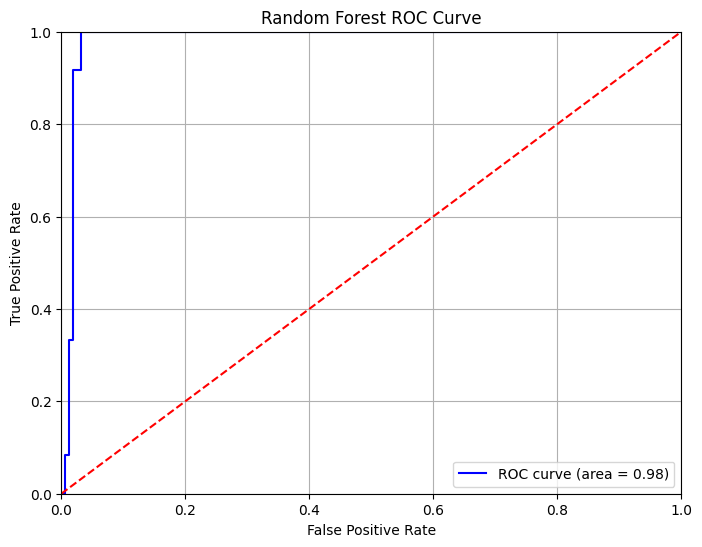

In [47]:
# Plotting ROC curve for Random Forest
plot_roc_curve(y_test, y_scores_rf, title='Random Forest ROC Curve')

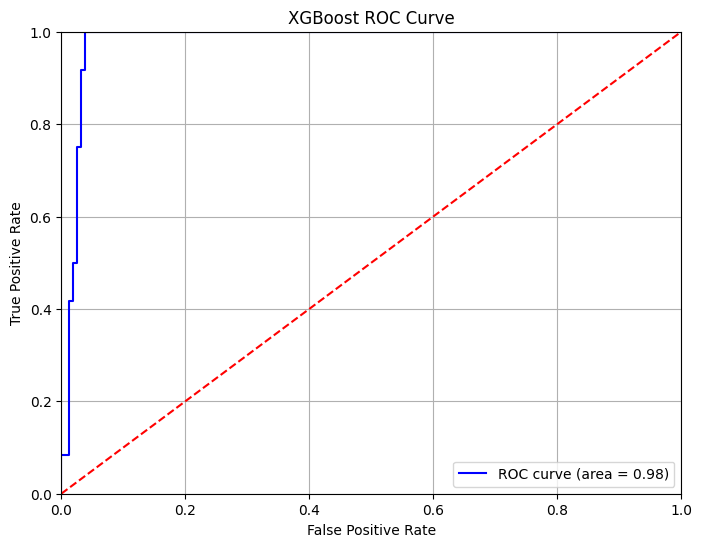

In [48]:
# Plotting ROC curve for XGBoost
plot_roc_curve(y_test, y_scores_xgb, title='XGBoost ROC Curve')

# **Hyperparameter Tuning Using Random Search Algorithm**

## Hyperparameter Tuning For Support Vector Machine

In [49]:
# Defining a grid of hyperparameters for the SVM model to search over
svc_param_grid = {
    'C': uniform(0.1, 10),
    'gamma': uniform(0.01, 1),
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'coef0': uniform(0, 1),
    'shrinking': [True, False],
    'class_weight': ['balanced', None],
    'decision_function_shape': ['ovo', 'ovr']
}

# Using RandomizedSearchCV to find the best hyperparameters by randomly exploring the grid
svc_random_search = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=svc_param_grid,
    n_iter=100,  # Number of random parameter combinations to try
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=2
)

# Fitting the model using training data
svc_random_search.fit(X_train_scaled, y_train)

# Getting the best estimator
best_svm = svc_random_search.best_estimator_
print("Best parameters for SVM:", svc_random_search.best_params_)


# Evaluate the best model using the test data
y_pred_support_vm = best_svm.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_support_vm))
print(classification_report(y_test, y_pred_support_vm))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=3.845401188473625, class_weight=balanced, coef0=0.1834347898661638, decision_function_shape=ovr, degree=2, gamma=0.606850157946487, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=3.845401188473625, class_weight=balanced, coef0=0.1834347898661638, decision_function_shape=ovr, degree=2, gamma=0.606850157946487, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=3.845401188473625, class_weight=balanced, coef0=0.1834347898661638, decision_function_shape=ovr, degree=2, gamma=0.606850157946487, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=3.845401188473625, class_weight=balanced, coef0=0.1834347898661638, decision_function_shape=ovr, degree=2, gamma=0.606850157946487, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=3.845401188473625, class_weight=balanced, coef0=0.1834347898661638, decision_function_shape=ovr, degree=2, gamma=0.606850157946487, kernel=poly, shrinking=True; t

# Hyperparameter Tuning For Random Forest

In [50]:
# Define parameter grid
rand_f_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
    'max_depth': [None, 3, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [1, 2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None]
}

#  Using RandomizedSearchCV to find the best hyperparameters by randomly exploring the grid
rand_f_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=rand_f_param_grid,
    n_iter=50, # Number of random parameter combinations to try
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=2
)

# Fitting the model
rand_f_random_search.fit(X_train_scaled, y_train)

# Getting the best estimator
best_rf = rand_f_random_search.best_estimator_

# Evaluating
y_pred_rand_f = best_rf.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_rand_f))
print(classification_report(y_test, y_pred_rand_f))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;

# Hyperparameter Tuning XGBOOST

In [51]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb

# Defining parameter grid
xgboost_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [3, 5, 7, 9, 11],  # Maximum depth of trees
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'subsample': uniform(0.5, 0.5),  # Subsampling ratio
    'colsample_bytree': uniform(0.5, 0.5)  # Feature subsampling ratio
}

# Using RandomizedSearchCV to find the best hyperparameters
xgboost_random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, tree_method="auto", random_state=42),
    param_distributions=xgboost_param_grid,
    n_iter=50,  # Number of random parameter combinations to try
    scoring='accuracy',  # Metric to optimize
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=2
)

# Fitting the model to the training data
xgboost_random_search.fit(X_train_scaled, y_train)

# Extracting the best model
best_xgb = xgboost_random_search.best_estimator_

# Evaluating the model
y_pred_xgboost = best_xgb.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_xgboost))  # Print confusion matrix
print(classification_report(y_test, y_pred_xgboost))  # Print detailed performance metrics


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.2952142919229748, max_depth=7, n_estimators=500, subsample=0.7984250789732434; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.2952142919229748, max_depth=7, n_estimators=500, subsample=0.7984250789732434; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.2952142919229748, max_depth=7, n_estimators=500, subsample=0.7984250789732434; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.2952142919229748, max_depth=7, n_estimators=500, subsample=0.7984250789732434; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.2952142919229748, max_depth=7, n_estimators=500, subsample=0.7984250789732434; total time=   0.1s
[CV] END colsample_bytree=0.7229163764267956, learning_rate=0.039992474745400866, max_depth=7, n_estimators=500, subsample=0.8005575058716

In [52]:
# Defining parameter grid
xgboost_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# Using RandomizedSearchCV to find the best hyperparameters by randomly exploring the grid
xgboost_random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42),
    param_distributions=xgboost_param_grid,
    n_iter=50, # Number of random parameter combinations to try
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=2
)

# Fitting in Model
xgboost_random_search.fit(X_train_scaled, y_train)
best_xgb = xgboost_random_search.best_estimator_

# Evaluating
y_pred_xgboost = best_xgb.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_xgboost))
print(classification_report(y_test, y_pred_xgboost))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.2952142919229748, max_depth=7, n_estimators=500, subsample=0.7984250789732434; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.2952142919229748, max_depth=7, n_estimators=500, subsample=0.7984250789732434; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.2952142919229748, max_depth=7, n_estimators=500, subsample=0.7984250789732434; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.2952142919229748, max_depth=7, n_estimators=500, subsample=0.7984250789732434; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.2952142919229748, max_depth=7, n_estimators=500, subsample=0.7984250789732434; total time=   0.1s
[CV] END colsample_bytree=0.7229163764267956, learning_rate=0.039992474745400866, max_depth=7, n_estimators=500, subsample=0.8005575058716

# **Explainable AI using SHAP**

In [53]:
# Fitting the explainer using Random Forest model and test data
AI_explainer = shap.Explainer(rand_f_model.predict, X_test_scaled)

# Calculating the SHAP values
shap_values = AI_explainer(X_test)

PermutationExplainer explainer: 172it [00:48,  3.18it/s]


In [54]:
# Using SHAP values to interpret feature contributions in the Random Forest model predictions.
shap_values

.values =
array([[-3.43333333e-02, -1.66666667e-03,  2.66666667e-03, ...,
        -1.66666667e-03,  3.33333333e-04, -3.33333333e-04],
       [-1.96666667e-02, -1.33333333e-03,  1.00000000e-03, ...,
        -1.33333333e-03,  2.31296463e-19,  1.66666667e-03],
       [-2.40000000e-02, -1.33333333e-03, -5.78241159e-19, ...,
        -1.66666667e-03,  6.66666667e-04,  3.33333333e-04],
       ...,
       [-3.60000000e-02, -2.00000000e-03, -3.33333333e-04, ...,
        -1.66666667e-03,  3.33333333e-04, -2.31296463e-19],
       [-3.33333333e-02,  2.31296463e-19,  6.66666667e-04, ...,
        -3.33333333e-03,  1.00000000e-03,  1.33333333e-03],
       [-3.53333333e-02, -2.33333333e-03,  1.33333333e-03, ...,
        -2.66666667e-03,  3.33333333e-04,  1.00000000e-03]])

.base_values =
array([0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07

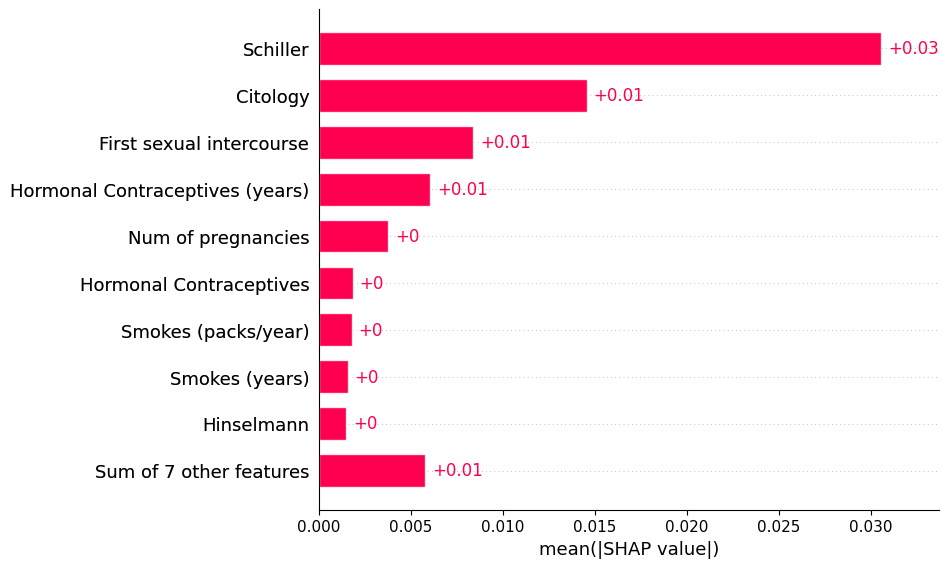

In [55]:
#Visuaslizing Bar plot of top features using SHAP values
shap.plots.bar(shap_values)

The plot visualises the mean absolute SHAP (SHapley Additive exPlanations) values, highlighting the most influential features in a model. Here are key points to note:

## Feature Importance Ranking:

* The Schiller feature exhibits the highest importance, significantly impacting the model's predictions with a mean SHAP value of approximately 0.03.
* Features like Citology, First sexual intercourse, and Hormonal Contraceptives (years) follow, though their impacts are comparatively smaller.

## Contribution Distribution:

* The remaining features, including Num of pregnancies, Hormonal Contraceptives, and IUD (years), contribute marginally to the predictions.
* The cumulative contribution of minor features (Sum of 7 other features) also demonstrates some significance.

## Model Insights:

* The plot suggests that the model heavily relies on a few specific features, notably Schiller and Citology, to make decisions.
* This focus may indicate the necessity to ensure data quality and completeness for these critical features to enhance model reliability and accuracy.

#Summary plot: beeswarm

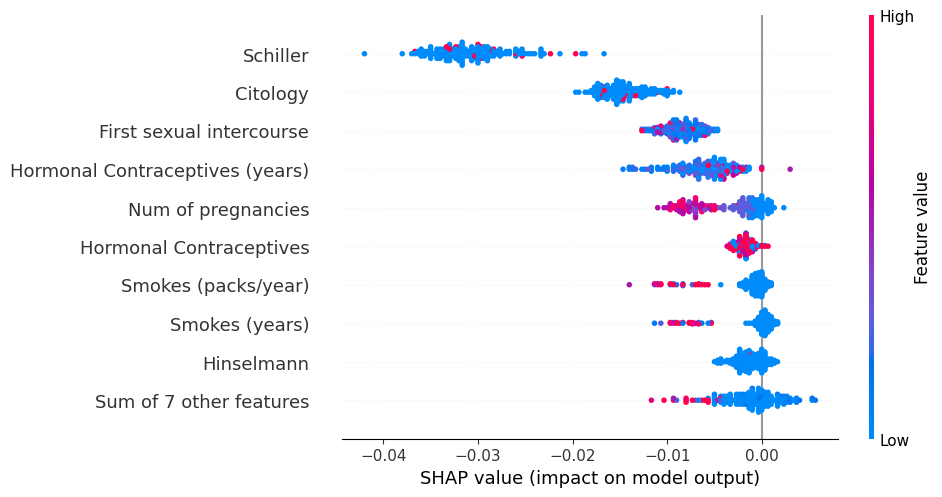

In [56]:
# Visualizing feature importance using a beeswarm plot
shap.plots.beeswarm(shap_values)

This is a SHAP (SHapley Additive exPlanations) summary plot, which explains the contribution of individual features to a machine learning model's predictions. Here's a breakdown of what the visualization represents:

## Interpretation:

  * "Schiller": This is the most impactful feature in the model. High values (red dots) generally decrease the prediction (negative SHAP values).
  * "Cytology": Similarly impactful but with more variability in the impact, as seen by the spread of points.
  * "First sexual intercourse" and "Hormonal Contraceptives (years)": These features have moderate impacts, with low values typically leading to higher predictions (positive SHAP values).
  * Other features: Such as "Smokes (years)" and "IUD (years)" have smaller impacts, as their SHAP values are closer to zero.

This visualization is particularly useful in explaining model behavior, diagnosing biases, and identifying the most relevant factors contributing to model predictions, such as predicting cervical cancer risk in this context.

# Waterfall plot


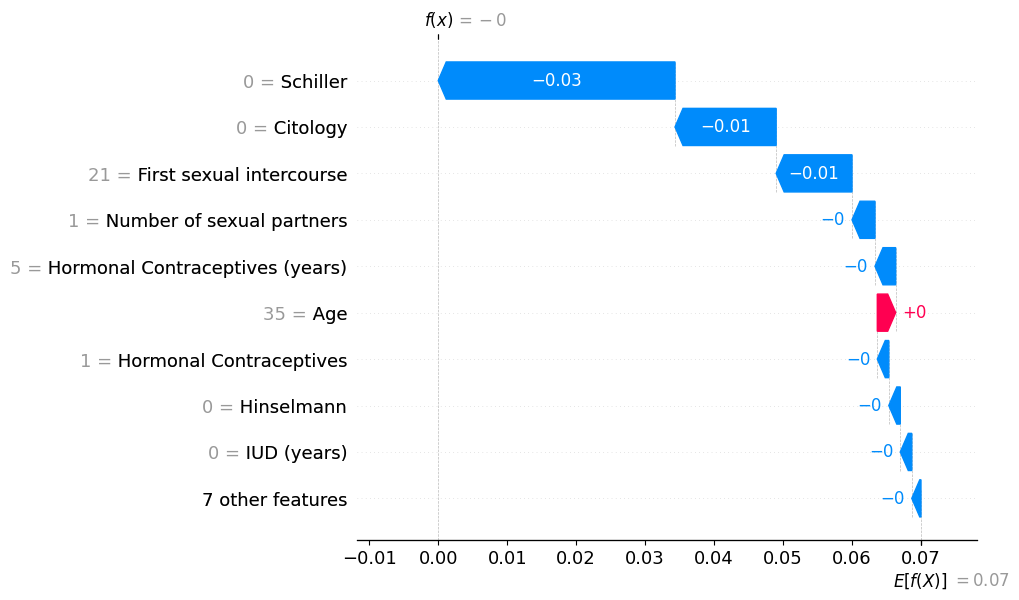

In [57]:
# Display a waterfall plot to explain the model's prediction for the first instance
shap.plots.waterfall(shap_values[0])

This is a SHAP waterfall plot, a visualization used to explain how individual features contribute to a specific prediction. Here's how to interpret it:

## Key Elements:

   * Prediction Breakdown: The top of the plot shows the model's predicted value (f(x)) for this specific instance, which is -0. The horizontal axis represents the SHAP values adding up to the model's output (E[f(X)]), the base value, is 0.07).

   * Feature Contributions: Each feature's contribution to the prediction is represented as a horizontal bar. Blue bars indicate features that decrease the prediction, while red bars indicate features that increase the prediction.

   * Base Value (E[f(X)]): This is the average model prediction across the dataset, shown as a starting point (0.07 here). The sum of the SHAP values for all features plus the base value equals the predicted value.

   * Feature Values: Each feature lists its specific value for this instance (e.g., "0 = Schiller," "21 = First sexual intercourse"). These values are important for understanding their individual impact.

## Interpretation:

  * "Schiller": This is the most influential feature, decreasing the prediction by 0.03.
  * "Cytology": Contributes a smaller negative impact of 0.01 to the prediction.
  * "First sexual intercourse": Reduces the prediction slightly with almost no visible impact.
  * Other Features: Factors like "Hormonal Contraceptives (years)" and "Number of sexual partners" contribute marginally. Features like "Num of pregnancies" and "STDs: genital herpes" have a negligible effect, with SHAP values near 0.

## Purpose:

This plot explains how a specific model decision was made by illustrating the cumulative effect of all feature contributions. It's particularly valuable in fields like healthcare, where understanding why a prediction was made is crucial for transparency and trust.

# Applying smote to the imbalace data

In [58]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after SMOTE
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts())


Original class distribution: Biopsy
0    370
1     29
Name: count, dtype: int64
Resampled class distribution: Biopsy
0    370
1    370
Name: count, dtype: int64


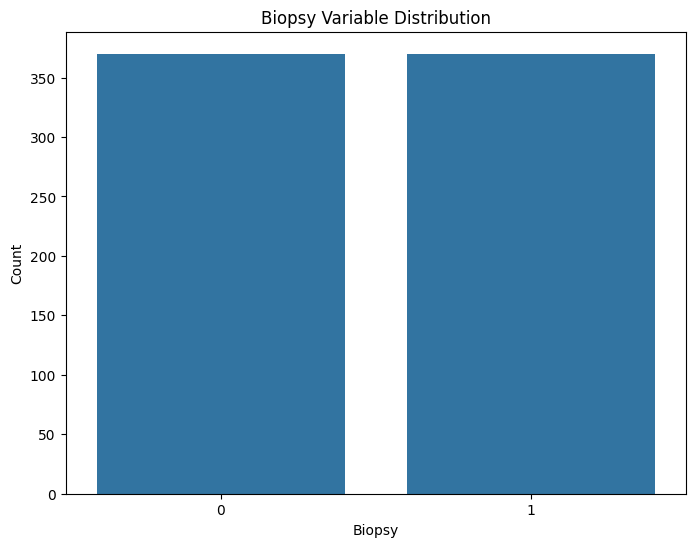

In [59]:
# Plot the Biopsy variable distribution
plt.figure(figsize=(8, 6))
# Convert the Series to DataFrame and provide a column name
sns.countplot(x='Biopsy', data=pd.DataFrame(y_train_resampled, columns=['Biopsy']))
plt.title('Biopsy Variable Distribution')
plt.xlabel('Biopsy')
plt.ylabel('Count')
plt.show()

In [60]:
# Creating and fitting the SVM model with balanced class weights
support_vm_model = SVC(class_weight='balanced', kernel='rbf')
support_vm_model.fit(X_train_resampled, y_train_resampled)

# Making predictions
y_pred_support_vm = support_vm_model.predict(X_test_scaled)

# Evaluating the model
print(confusion_matrix(y_test, y_pred_support_vm))
print(classification_report(y_test, y_pred_support_vm))


[[151   8]
 [  3   9]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       159
           1       0.53      0.75      0.62        12

    accuracy                           0.94       171
   macro avg       0.75      0.85      0.79       171
weighted avg       0.95      0.94      0.94       171



In [61]:
# Creating and fitting the Random Forest model with balanced class weights
rand_f_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rand_f_model.fit(X_train_resampled, y_train_resampled)

# Making predictions
y_pred_rand_f = rand_f_model.predict(X_test_scaled)

# Evaluating the model
print(confusion_matrix(y_test, y_pred_rand_f))
print(classification_report(y_test, y_pred_rand_f))

[[155   4]
 [  3   9]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       159
           1       0.69      0.75      0.72        12

    accuracy                           0.96       171
   macro avg       0.84      0.86      0.85       171
weighted avg       0.96      0.96      0.96       171



In [62]:
# Calculate scale_pos_weight (this is an approximation to balance the class weights)
scale_pos_weight = (y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1])

# Create the XGBoost model
xgboost_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Fit the model
xgboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgboost = xgboost_model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_xgboost))
print(classification_report(y_test, y_pred_xgboost))


[[155   4]
 [  3   9]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       159
           1       0.69      0.75      0.72        12

    accuracy                           0.96       171
   macro avg       0.84      0.86      0.85       171
weighted avg       0.96      0.96      0.96       171



In [63]:
# Defining a function to evaluate accuracy for a model
def evaluate_accuracy(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

# Evaluating the SVM model
svm_accuracy = evaluate_accuracy(y_test, y_pred_support_vm)

# Evaluating the Random Forest model
rf_accuracy = evaluate_accuracy(y_test, y_pred_rand_f)

# Evaluating the XGBoost model
xgb_accuracy = evaluate_accuracy(y_test, y_pred_xgboost)

# Creating a comparison table
results_table = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [round(svm_accuracy, 2), round(rf_accuracy, 2), round(xgb_accuracy, 2)]
})

# Visualizing the table
print("\nComparison of Model Accuracy:")
print(results_table)

# Optionally,Saving the table to CSV file
results_table.to_csv("model_accuracy_comparison.csv", index=False)


Comparison of Model Accuracy:
           Model  Accuracy
0            SVM      0.94
1  Random Forest      0.96
2        XGBoost      0.96


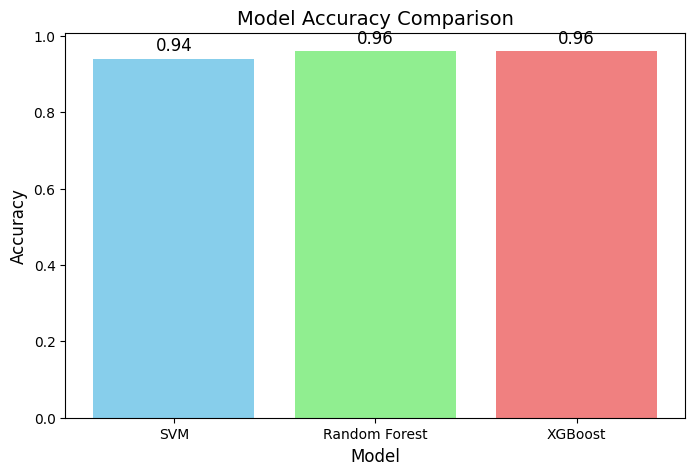

In [64]:
# Plotting the accuracy comparison bar chart
plt.figure(figsize=(8, 5))
plt.bar(results_table['Model'], results_table['Accuracy'], color=['skyblue', 'lightgreen', 'lightcoral'])

# Adding labels and title
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Showing the accuracy values on top of the bars
for i, v in enumerate(results_table['Accuracy']):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


In [65]:
# Function to plot a confusion matrix for visualizing model performance
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    # Compute the confusion matrix based on true and predicted labels
    cm = confusion_matrix(y_true, y_pred)

    # Setting the size of the plot
    plt.figure(figsize=(8, 6))

    # Plotting the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

    # Adding a title to the plot
    plt.title(title)

    # Labelling the x-axis to indicate predicted classes
    plt.xlabel('Predicted')

    # Labelling the y-axis to indicate true classes
    plt.ylabel('True')

    # Displing the plot
    plt.show()


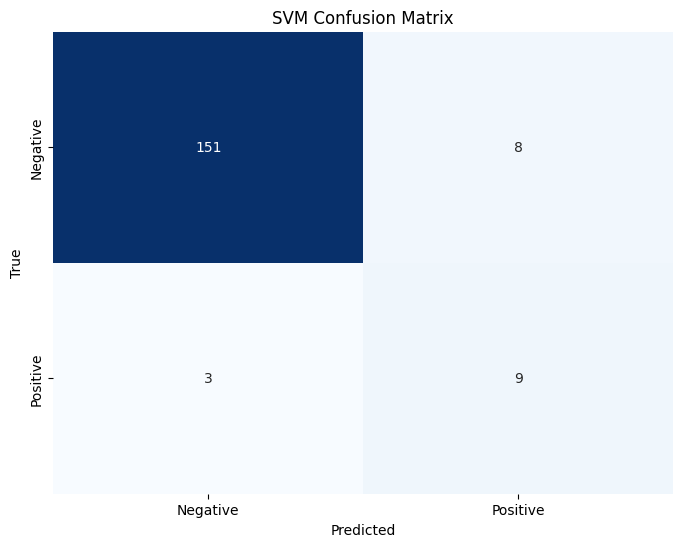

In [66]:
# Plotting heatmap for SVM confusion matrix
plot_confusion_matrix(y_test, y_pred_support_vm, title='SVM Confusion Matrix')


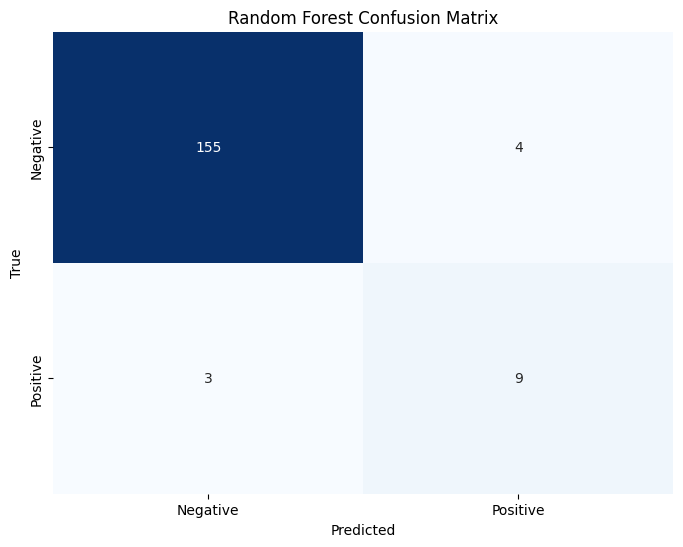

In [67]:
# Plotting heatmap for Random Forest confusion matrix
plot_confusion_matrix(y_test, y_pred_rand_f, title='Random Forest Confusion Matrix')


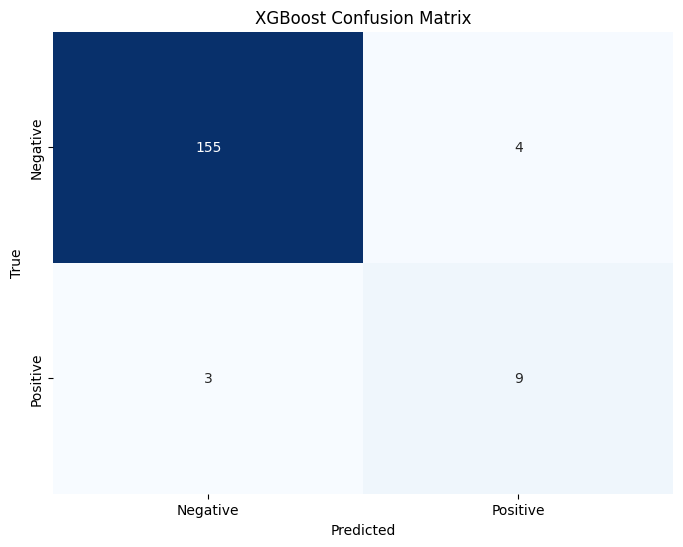

In [68]:
# Plotting heatmap for XGBoost confusion matrix
plot_confusion_matrix(y_test, y_pred_xgboost, title='XGBoost Confusion Matrix')

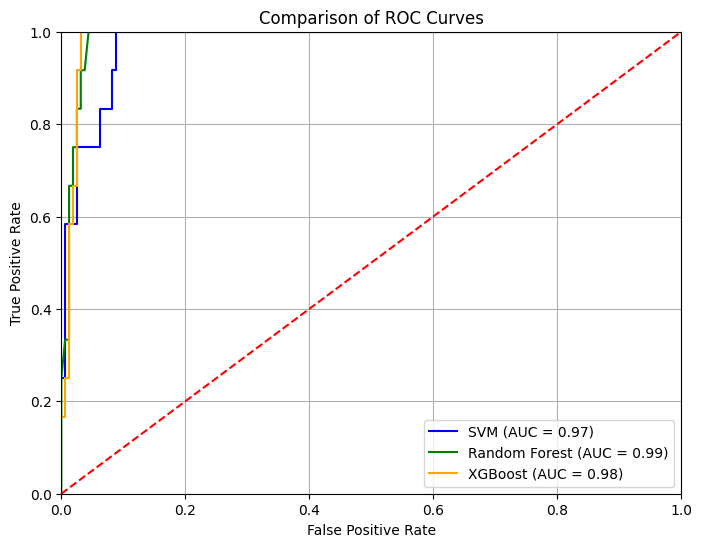

In [69]:
# Resetting the matplotlib state
plt.clf()
plt.close('all')
plt.style.use('default')  # Ensuring consistent plotting style

# Function to plot ROC curve
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR)
def plot_roc_curve(y_true, y_scores, label, color):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve for the model
    plt.plot(fpr, tpr, color=color, label=f'{label} (AUC = {roc_auc:.2f})')

# Getting predicted probabilities for the Models
# Getting Decision function for SVC
y_scores_svm = support_vm_model.decision_function(X_test_scaled)

# Getting predicted probabilities for Random Forest
y_scores_rf = rand_f_model.predict_proba(X_test_scaled)[:, 1]

# Getting predicted probabilities for XGBoost
y_scores_xgb = xgboost_model.predict_proba(X_test_scaled)[:, 1]

# Create a single plot for all ROC curves
plt.figure(figsize=(8, 6))

# Plot ROC curve for SVM
plot_roc_curve(y_test, y_scores_svm, label='SVM', color='blue')

# Plot ROC curve for Random Forest
plot_roc_curve(y_test, y_scores_rf, label='Random Forest', color='green')

# Plot ROC curve for XGBoost
plot_roc_curve(y_test, y_scores_xgb, label='XGBoost', color='orange')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Final plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()
